## Loading data

In [28]:
import pandas as pd
import numpy as np

df = pd.read_json("hf://datasets/allenai/multipref/MultiPref-Train.jsonl", lines=True)

In [29]:
normal_list = []
expert_list = []
for index, row in df.iterrows():
    worker_answer = row["normal_worker_annotations"]
    expert_answer = row["expert_worker_annotations"]
    for i in range(len(worker_answer)):
        worker_id = worker_answer[i]['evaluator']
        if worker_id not in normal_list:
            normal_list.append(worker_id)
    for i in range(len(expert_answer)):
        expert_id = expert_answer[i]['evaluator']
        if expert_id not in expert_list:
            expert_list.append(expert_id)

worker_list = normal_list + expert_list
signals = {'A-is-clearly-better': 0, 'A-is-slightly-better': 1, 'Tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4}
human_data = np.full((len(worker_list), len(df)), np.nan)
for j, row in df.iterrows():
    worker_answer = row["normal_worker_annotations"]
    expert_answer = row["expert_worker_annotations"]
    for i in range(len(worker_answer)):
        worker_id = worker_answer[i]['evaluator']
        index = worker_list.index(worker_id)
        r = signals[worker_answer[i]['overall_pref']]
        human_data[index, j] = r
    for i in range(len(expert_answer)):
        expert_id = expert_answer[i]['evaluator']
        index = worker_list.index(expert_id)
        r = signals[expert_answer[i]['overall_pref']]
        human_data[index, j] = r

answered_question = []
for i in range(np.size(human_data, axis = 0)):
    valid_index = np.where(~np.isnan(human_data[i,:]))[0]
    answered_question.append(len(valid_index))

print(np.average(answered_question))

184.33480176211455


In [32]:
flattened = human_data.flatten()
flattened_no_nan = flattened[~np.isnan(flattened)]

# Count occurrences
values, counts = np.unique(flattened_no_nan, return_counts=True)

# Convert counts to probabilities
prior = counts / counts.sum()

print('prior signal distirbution', prior)

prior signal distirbution [0.09853265 0.16683395 0.26280948 0.25069305 0.22113087]


In [34]:
import torch

file_path = 'multipref/gpt-4o-mini/total_output_labels.pt'
signals = {'A-is-clearly-better': 0, 'A-is-better': 0, 'A-is-slightly-better': 1, 'Tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4, 'B-is-better': 4}

llm_data = np.array(torch.load(file_path))
n = len(llm_data)

gpt4_data = np.ones(n)*np.nan
for i in range(len(llm_data)):
    if llm_data[i] ==  None:
        continue
    r = signals[llm_data[i]['final verdict']]
    gpt4_data[i] = r

file_path = 'multipref/gpt-4o-mini_1/total_output_labels.pt'
signals = {'A-is-clearly-better': 0, 'A-is-better': 0, 'A-is-slightly-better': 1, 'Tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4, 'B-is-better': 4}

llm_data = np.array(torch.load(file_path))
n = len(llm_data)

gpt4_data_2 = np.ones(n)*np.nan
for i in range(len(llm_data)):
    if llm_data[i] ==  None:
        continue
    r = signals[llm_data[i]['final verdict']]
    gpt4_data_2[i] = r

file_path = 'multipref/gpt-4o-mini_2/total_output_labels.pt'
signals = {'A-is-clearly-better': 0, 'A-is-better': 0, 'A-is-slightly-better': 1, 'Tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4, 'B-is-better': 4}

llm_data = np.array(torch.load(file_path))
n = len(llm_data)

gpt4_data_3 = np.ones(n)*np.nan
for i in range(len(llm_data)):
    if llm_data[i] ==  None:
        continue
    r = signals[llm_data[i]['final verdict']]
    gpt4_data_3[i] = r
    

file_path = 'multipref/gpt-3.5-turbo/total_output_labels.pt'
signals = {'A-is-clearly-better': 0, 'A-is-slightly-better': 1, 'Tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4}

llm_data = np.array(torch.load(file_path))

gpt3_data = np.ones(n)*np.nan
for i in range(len(llm_data)):
    if llm_data[i] ==  None:
        continue
    if 'final verdict' in llm_data[i].keys():
        r = signals[llm_data[i]['final verdict']]
    else:
        r = signals[llm_data[i]['final_verdict']]
    gpt3_data[i] = r


file_path = 'multipref/gpt-3.5-turbo_1/total_output_labels.pt'
signals = {'A-is-clearly-better': 0, 'Response A-is-clearly-better': 0, 'A-is-slightly-better': 1, 'Tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4}

llm_data = np.array(torch.load(file_path))

gpt3_data_2 = np.ones(n)*np.nan
for i in range(len(llm_data)):
    if llm_data[i] ==  None:
        continue
    if 'final verdict' in llm_data[i].keys():
        r = signals[llm_data[i]['final verdict']]
    else:
        r = signals[llm_data[i]['final_verdict']]
    gpt3_data_2[i] = r


file_path = 'multipref/gpt-3.5-turbo_2/total_output_labels.pt'
signals = {'A-is-clearly-better': 0, 'Response A is clearly better': 0, 'A-is-slightly-better': 1, 'Tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4}

llm_data = np.array(torch.load(file_path))

gpt3_data_3 = np.ones(n)*np.nan
for i in range(len(llm_data)):
    if llm_data[i] ==  None:
        continue
    if 'final verdict' in llm_data[i].keys():
        r = signals[llm_data[i]['final verdict']]
    else:
        r = signals[llm_data[i]['final_verdict']]
    gpt3_data_3[i] = r
    

file_path = 'multipref/gemma-2-2b-it/output_labels_all.pt'
signals = {'A-is-clearly-better': 0, 'A-is-slightly-better': 1, 'o A-is-slightly-better': 1, 'Tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4}

llm_data = np.array(torch.load(file_path))

gemma_data = np.ones(n)*np.nan
for i in range(len(llm_data)):
    if llm_data[i] ==  None:
        continue
    if 'final verdict' in llm_data[i].keys():
        if llm_data[i]['final verdict'] not in signals.keys():
            continue
        r = signals[llm_data[i]['final verdict']]
    elif 'final_verdict' in llm_data[i].keys():
        r = signals[llm_data[i]['final_verdict']]
    else:
        r = np.nan
    gemma_data[i] = r


file_path = 'multipref/gemma-2-2b-it_1/output_labels_all.pt'
signals = {'A-is-clearly-better': 0, 'A-is-slightly-better': 1, 'o A-is-slightly-better': 1, 'Tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4}

llm_data = np.array(torch.load(file_path))

gemma_data_2 = np.ones(n)*np.nan
for i in range(len(llm_data)):
    if llm_data[i] ==  None:
        continue
    if 'final verdict' in llm_data[i].keys():
        if llm_data[i]['final verdict'] not in signals.keys():
            continue
        r = signals[llm_data[i]['final verdict']]
    elif 'final_verdict' in llm_data[i].keys():
        r = signals[llm_data[i]['final_verdict']]
    else:
        r = np.nan
    gemma_data_2[i] = r


file_path = 'multipref/gemma-2-2b-it_2/output_labels_all.pt'
signals = {'A-is-clearly-better': 0, 'A-is-slightly-better': 1, 'o A-is-slightly-better': 1, 'Tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4}

llm_data = np.array(torch.load(file_path))

gemma_data_3 = np.ones(n)*np.nan
for i in range(len(llm_data)):
    if llm_data[i] ==  None:
        continue
    if 'final verdict' in llm_data[i].keys():
        if llm_data[i]['final verdict'] not in signals.keys():
            continue
        r = signals[llm_data[i]['final verdict']]
    elif 'final_verdict' in llm_data[i].keys():
        r = signals[llm_data[i]['final_verdict']]
    else:
        r = np.nan
    gemma_data_3[i] = r


file_path = 'multipref/Mistral-7B-Instruct-v0.3/output_labels_all.pt'
signals = {'A-is-clearly-better': 0, 'Response A-is-clearly-better': 0, 'A-is-slightly-better': 1, 'Response A-is-slightly-better': 1, 'Tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4}

llm_data = np.array(torch.load(file_path))
n = len(llm_data)

mistral_data = np.ones(n)*np.nan
for i in range(len(llm_data)):
    if llm_data[i] ==  None:
        continue
    if 'final verdict' in llm_data[i].keys():
        if llm_data[i]['final verdict'] not in signals.keys():
            continue
        r = signals[llm_data[i]['final verdict']]
    elif 'final_verdict' in llm_data[i].keys():
        r = signals[llm_data[i]['final_verdict']]
    else:
        r = np.nan
    mistral_data[i] = r

file_path = 'multipref/Mistral-7B-Instruct-v0.3_1/output_labels_all.pt'
signals = {'A-is-clearly-better': 0, 'Response A-is-clearly-better': 0, 'A-is-slightly-better': 1, 'Response A-is-slightly-better': 1, 'Tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4}

llm_data = np.array(torch.load(file_path))
n = len(llm_data)

mistral_data_2 = np.ones(n)*np.nan
for i in range(len(llm_data)):
    if llm_data[i] ==  None:
        continue
    if 'final verdict' in llm_data[i].keys():
        if llm_data[i]['final verdict'] not in signals.keys():
            continue
        r = signals[llm_data[i]['final verdict']]
    elif 'final_verdict' in llm_data[i].keys():
        r = signals[llm_data[i]['final_verdict']]
    else:
        r = np.nan
    mistral_data_2[i] = r

file_path = 'multipref/Mistral-7B-Instruct-v0.3_2/output_labels_all.pt'
signals = {'A-is-clearly-better': 0, 'Response A-is-clearly-better': 0, 'A-is-slightly-better': 1, 'Response A-is-slightly-better': 1, 'Tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4}

llm_data = np.array(torch.load(file_path))
n = len(llm_data)

mistral_data_3 = np.ones(n)*np.nan
for i in range(len(llm_data)):
    if llm_data[i] ==  None:
        continue
    if 'final verdict' in llm_data[i].keys():
        if llm_data[i]['final verdict'] not in signals.keys():
            continue
        r = signals[llm_data[i]['final verdict']]
    elif 'final_verdict' in llm_data[i].keys():
        r = signals[llm_data[i]['final_verdict']]
    else:
        r = np.nan
    mistral_data_3[i] = r


file_path = 'multipref/Phi-3.5-mini-instruct/output_labels_all.pt'
signals = {'A-is-clearly-better': 0, 'A-is-slightly-better': 1, 'Tie': 2, 'tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4}

llm_data = np.array(torch.load(file_path))
n = len(llm_data)

phi_data = np.ones(n)*np.nan
for i in range(len(llm_data)):
    if llm_data[i] ==  None:
        continue
    if 'final verdict' in llm_data[i].keys():
        if llm_data[i]['final verdict'] not in signals.keys():
            continue
        r = signals[llm_data[i]['final verdict']]
    elif 'final_verdict' in llm_data[i].keys():
        r = signals[llm_data[i]['final_verdict']]
    else:
        r = np.nan
    phi_data[i] = r

file_path = 'multipref/Phi-3.5-mini-instruct_1/output_labels_all.pt'
signals = {'A-is-clearly-better': 0, 'A-is-slightly-better': 1, 'Tie': 2, 'tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4}

llm_data = np.array(torch.load(file_path))
n = len(llm_data)

phi_data_2 = np.ones(n)*np.nan
for i in range(len(llm_data)):
    if llm_data[i] ==  None:
        continue
    if 'final verdict' in llm_data[i].keys():
        if llm_data[i]['final verdict'] not in signals.keys():
            continue
        r = signals[llm_data[i]['final verdict']]
    elif 'final_verdict' in llm_data[i].keys():
        r = signals[llm_data[i]['final_verdict']]
    else:
        r = np.nan
    phi_data_2[i] = r

file_path = 'multipref/Phi-3.5-mini-instruct_2/output_labels_all.pt'
signals = {'A-is-clearly-better': 0, 'A-is-slightly-better': 1, 'Tie': 2, 'tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4}

llm_data = np.array(torch.load(file_path))
n = len(llm_data)

phi_data_3 = np.ones(n)*np.nan
for i in range(len(llm_data)):
    if llm_data[i] ==  None:
        continue
    if 'final verdict' in llm_data[i].keys():
        if llm_data[i]['final verdict'] not in signals.keys():
            continue
        r = signals[llm_data[i]['final verdict']]
    elif 'final_verdict' in llm_data[i].keys():
        r = signals[llm_data[i]['final_verdict']]
    else:
        r = np.nan
    phi_data_3[i] = r

/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/3915465054.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  llm_data = np.array(torch.load(file_path))
/v

## Implement scoring mechanisms

In [37]:
"""
Compute confusion matrix for CA
"""

def split_matrix(matrix):
    n, m = matrix.shape
    half_n = n // 2

    group1 = set()
    group2 = set()

    for j in range(m):
        non_nan_indices = np.where(~np.isnan(matrix[:, j]))[0]
        
        group1_candidates = non_nan_indices[:2]
        group2_candidates = non_nan_indices[2:]
        
        if group1.intersection(group1_candidates) or group2.intersection(group2_candidates):
            group1.update(group2_candidates)
            group2.update(group1_candidates)
        else:
            group1.update(group1_candidates)
            group2.update(group2_candidates)

    return sorted(group1), sorted(group2)

def empirical_distribution(X):
    """
    Input: "X" is a matrix of agents' reports.
    Output: "P" is a K*m matrix where each column is the empirical distribution of agents' reports in X on each task.
    """
    m = np.size(X, axis = 1)
    
    P = np.zeros((K, m))
    answered_count = np.sum(X >= 0, axis = 0)
    for i in range(K):
        P[i] = np.sum(X == i, axis = 0)/answered_count
    
    return P

def distribution_estimator_soft(p1, p2): 
    m = np.size(p1, axis = 1)
    index_1 = np.where(~np.isnan(np.sum(p1, axis = 0)))[0]
    index_2 = np.where(~np.isnan(np.sum(p2, axis = 0)))[0]
    index_c = np.intersect1d(index_1, index_2)
    P = np.zeros((K,K))
    for j in index_c:
        for i in range(K):
            P[i] += p1[i,j]*p2[:,j]/len(index_c)
    Q1 = np.average(p1[:,index_1], axis = 1)
    Q2 = np.average(p2[:,index_2], axis = 1)
    return P, Q1, Q2

def delta_matrix(response):
    n = np.size(response, axis = 0)
    index_1, index_2 = split_matrix(response)
    gp1 = np.full(n, False)
    gp1[index_1] = True
    gp2 = np.full(n, False)
    gp2[index_2] = True
    
    p1 = empirical_distribution(response[gp1])
    p2 = empirical_distribution(response[gp2])
    P, Q1, Q2 = distribution_estimator_soft(p1, p2)
    
    delta = np.sign(P - Q2*Q1.reshape(-1, 1))
    return delta

def conditional_delta_matrix(response, llm_response):
    llm_response = np.array(llm_response)
    delta = np.zeros((K,K,K))
    for i in range(K):
        index = np.where(llm_response == i)[0]
        delta[i] = delta_matrix(response[:,index])
    return delta

In [39]:
K = 5
delta = delta_matrix(human_data)
cond_delta = conditional_delta_matrix(human_data, gpt4_data)

In [41]:
from collections import Counter

### CA

def CA_score(dataset, delta):
    n = np.size(dataset, axis = 1)
    m = np.size(dataset, axis = 0)
    score = np.full(m, np.nan)
    for i in range(m):
        if len(np.where(dataset[i,:] >= 0)[0]) < 30:
            continue
        index_peer = np.delete(np.arange(m), i)
        peer = empirical_distribution(dataset[index_peer,:])
        index_i = np.where(dataset[i,:] >= 0)[0]
        S = 0
        for index_b in index_i:
            ri_b = int(dataset[i][index_b])
            index_p = np.random.choice([t for t in range(n) if t != index_b])
            S += 0.5*(np.sum((peer[:,index_b] - peer[:,index_p])*delta[ri_b]))/len(index_i)
        score[i] = S
    return score

### OA

def OA_score(dataset):
    n = np.size(dataset, axis = 1)
    m = np.size(dataset, axis = 0)
    score = np.full(m, np.nan)
    for i in range(m):
        if len(np.where(dataset[i,:] >= 0)[0]) < 30:
            continue
        index_peer = np.delete(np.arange(m), i)
        peer = empirical_distribution(dataset[index_peer,:])
        index_i = np.where(dataset[i,:] >= 0)[0]
        S = 0
        for index in index_i:
            ri_b = int(dataset[i][index])
            S += peer[ri_b,index]/len(index_i)
        score[i] = S
    return score

### OA_Z

def OA_score_conditioned(dataset, llm_data):
    n = np.size(dataset, axis = 1)
    m = np.size(dataset, axis = 0)
    score = np.full(m, np.nan)
    for i in range(m):
        if len(np.where(dataset[i,:] >= 0)[0]) < 30:
            continue
        index_peer = np.delete(np.arange(m), i)
        peer = empirical_distribution(dataset[index_peer,:])
        index_i = np.where(dataset[i,:] >= 0)[0]
        S = 0
        for index in index_i:
            ri_b = int(dataset[i][index])
            if ri_b != llm_data[index]:
                S += peer[ri_b,index]/len(index_i)
        score[i] = S
    return score

### CA_Z

def CA_score_conditioned(dataset, llm_data, cond_delta):
    n = np.size(dataset, axis = 1)
    m = np.size(dataset, axis = 0)
    score = np.full(m, np.nan)

    p_llm = np.zeros(K)
    for k in range(K):
        p_llm[k] = np.count_nonzero(np.array(llm_data) == k)/len(np.where(llm_data >= 0)[0])
    
    for i in range(m):
        if len(np.where(dataset[i,:] >= 0)[0]) < 30:
            continue
        index_peer = np.delete(np.arange(m), i)
        peer = empirical_distribution(dataset[index_peer,:])
        index_i = np.where(dataset[i,:] >= 0)[0]
        S = 0
        for k in range(K):
            index_k = np.where(llm_data == k)[0]
            index_ik = np.intersect1d(index_k, index_i)
            if len(index_ik) <= 1:
                continue
            for index_b in index_ik:
                ri_b = int(dataset[i][index_b])
                index_p = np.random.choice([t for t in index_k if t != index_b])
                S += 0.5*(np.sum((peer[:,index_b] - peer[:,index_p])*cond_delta[k, ri_b]))/len(index_ik)*p_llm[k] 
        score[i] = S
    return score
    
### EM

def compute_log_likelihood(label_matrix, confusion_matrices, posteriors):
    n_labelers, n_tasks = label_matrix.shape
    n_classes = np.size(posteriors, axis = 1)
    ll = 0.0
    for j in range(n_tasks):
        # Identify which labelers answered this task (i.e. not np.nan)
        valid_labelers = ~np.isnan(label_matrix[:, j])
        labels_for_j = label_matrix[valid_labelers, j].astype(int)
        labelers_for_j = np.where(valid_labelers)[0]
        
        # For each possible true label k, compute the contribution
        # from the current posterior * product of confusion probabilities
        prob_k = np.zeros(n_classes)
        for k in range(n_classes):
            prod_confusion = 1.0
            for i, labeler_i in enumerate(labelers_for_j):
                l_ij = labels_for_j[i]
                prod_confusion *= confusion_matrices[labeler_i, l_ij, k]
            prob_k[k] = posteriors[j, k] * prod_confusion
        
        p_observed = prob_k.sum()
        if p_observed > 0:
            ll += np.log(p_observed + 1e-12)  # add small epsilon to avoid log(0)
    return ll

def majority_element_vector(vec):
    # Convert to a list if it's not already
    vec_list = list(vec)
    counter = Counter(vec_list)
    # most_common(1) returns a list of (elem, count) with the highest count
    element, count = counter.most_common(1)[0]
    return int(element)

def dawid_skene_em(
    label_matrix: np.ndarray, 
    n_classes: int, 
    max_iter: int = 50, 
    tol: float = 1e-6
):

    n_labelers, n_tasks = label_matrix.shape

    # Initialization
    pi = np.zeros(n_classes)
    gamma = np.zeros((n_classes,n_classes))
    n_mv = np.zeros(n_classes)
    for j in range(n_tasks):
        valid_labelers = ~np.isnan(label_matrix[:, j])
        labels_for_j = label_matrix[valid_labelers, j].astype(int)
        labelers_for_j = np.where(valid_labelers)[0]
        mv = majority_element_vector(labels_for_j)
        n_mv[mv] += 1
        for i, labeler_i in enumerate(labelers_for_j):
            l_ij = labels_for_j[i]
            pi[l_ij] += 1/n_tasks/len(labelers_for_j)
            gamma[l_ij,mv] += 1/len(labelers_for_j)
    gammga = gamma / n_mv
    
    posteriors = np.stack([pi]*n_tasks, axis=0)
    confusion_matrices = np.stack([gammga]*n_labelers, axis=0)

    old_ll = compute_log_likelihood(label_matrix, confusion_matrices, posteriors)

    for iteration in range(max_iter):
        # -----------------
        # E-step
        # -----------------
        for j in range(n_tasks):
            valid_labelers = ~np.isnan(label_matrix[:, j])
            labels_for_j = label_matrix[valid_labelers, j].astype(int)
            labelers_for_j = np.where(valid_labelers)[0]

            # For each class k, compute the unnormalized posterior:
            # P(Z_j = k) * product_i( confusion_matrices[i, L_ij, k] )
            unnormalized = np.zeros(n_classes)
            for k in range(n_classes):
                prod_confusion = 1.0
                for i, labeler_i in enumerate(labelers_for_j):
                    l_ij = labels_for_j[i]
                    prod_confusion *= confusion_matrices[labeler_i, l_ij, k]
                unnormalized[k] = posteriors[j, k] * prod_confusion
            # Normalize to get new posterior
            denom = unnormalized.sum()
            if denom > 0:
                posteriors[j] = unnormalized / denom
            else:
                # fallback if all zero
                posteriors[j] = 1.0 / n_classes
        
        # -----------------
        # M-step
        # -----------------
        # Recompute confusion matrices
        confusion_matrices.fill(0.0)  # reset to zero before counting

        # Accumulate counts
        for j in range(n_tasks):
            valid_labelers = ~np.isnan(label_matrix[:, j])
            labels_for_j = label_matrix[valid_labelers, j].astype(int)
            labelers_for_j = np.where(valid_labelers)[0]
            
            for i, labeler_i in enumerate(labelers_for_j):
                l_ij = labels_for_j[i]
                # Add posteriors[j, k] to confusion_matrices[labeler_i, l_ij, k]
                confusion_matrices[labeler_i, l_ij, :] += posteriors[j]
        
        # Normalize each labeler's confusion matrix by column
        # confusion_matrices[i, k_pred, k_true] 
        # = (sum over tasks where label was k_pred of P(Z_j = k_true)) / (sum over tasks of P(Z_j = k_true))
        for i in range(n_labelers):
            for k in range(n_classes):
                col_sum = confusion_matrices[i, :, k].sum()
                if col_sum > 0:
                    confusion_matrices[i, :, k] /= col_sum

        # Check for convergence via log-likelihood
        new_ll = compute_log_likelihood(label_matrix, confusion_matrices, posteriors)
        if abs(new_ll - old_ll) < tol:
            break
        old_ll = new_ll

    # Compute reliability as the average diagonal of confusion matrices
    reliability_scores = np.zeros(n_labelers)
    for i in range(n_labelers):
        diag_sum = 0.0
        for k in range(n_classes):
            diag_sum += confusion_matrices[i, k, k]*pi[k]
        reliability_scores[i] = diag_sum / n_classes

    return reliability_scores


## Simulating noisy crowds

In [43]:
import random

def modifying_human_data(human_data, p_llm, p_random, p_biased, llm_data, prior):
    m, n = human_data.shape
    num_rows_llm = int(p_llm * m)
    num_rows_rand = int(p_random * m)
    num_rows_cons = int(p_biased * m)
    all_rows = np.arange(m)
    data = human_data.copy()
    
    selected_rows_llm = np.random.choice(all_rows, num_rows_llm, replace=False)
    remaining_rows = np.setdiff1d(all_rows, selected_rows_llm)
    selected_rows_rand = np.random.choice(remaining_rows, num_rows_rand, replace=False)
    remaining_rows = np.setdiff1d(remaining_rows, selected_rows_rand)
    selected_rows_cons = np.random.choice(remaining_rows, num_rows_cons, replace=False)
    
    # for i in selected_rows_llm:
    #     non_nan_mask = ~np.isnan(data[i, :])
    #     data[i, non_nan_mask] = llm_data[non_nan_mask]

    for i in selected_rows_llm:
        non_nan_mask = ~np.isnan(data[i, :])
        num_ai = len(llm_data)
        random_ai = random.choices(range(num_ai))[0]
        data[i, non_nan_mask] = llm_data[random_ai][non_nan_mask]

    for i in selected_rows_rand:
        # non_nan_mask = ~np.isnan(data[i, :])
        # data[i, non_nan_mask] = np.random.randint(0, 5, size=np.sum(non_nan_mask))
        non_nan_mask = ~np.isnan(data[i, :])
        values = [0, 1, 2, 3, 4]
        probabilities = prior
        data[i, non_nan_mask] = np.random.choice(values, size=np.sum(non_nan_mask), p=probabilities)

    for i in selected_rows_cons:
        non_nan_mask = ~np.isnan(data[i, :])
        values = [0, 1, 2, 3, 4]
        probabilities = [0.025, 0.9, 0.025, 0.025, 0.025]
        data[i, non_nan_mask] = np.random.choice(values, size=np.sum(non_nan_mask), p=probabilities)

    identity = np.ones(m, dtype=int)
    identity[selected_rows_llm] = 0
    identity[selected_rows_rand] = 0
    identity[selected_rows_cons] = 0
    
    return data, identity

p_llm = 0.15
p_random = 0.1
p_biased = 0.1
data_corrupt, identity = modifying_human_data(human_data, p_llm, p_random, p_biased, [gpt3_data], prior)

In [55]:
from sklearn.metrics import roc_auc_score

p_cheat_max = 0.25
p_range = np.arange(0,p_cheat_max,0.05)
N = 50
K = 5

# Use two independent samples to simulate cheater signals, can add more to simulate cheaters with various LLMs
# llm_data_list = [phi_data_2, phi_data_3]
llm_data_list = [mistral_data, mistral_data_2, mistral_data_3, gpt4_data, gpt4_data_2, gpt4_data_3]
# llm_data_list = [gpt4_data_2, gpt4_data_3]
# llm_data_list = [gemma_data_2, gemma_data_3]
# llm_data_list = [mistral_data_2, mistral_data_3]

# Use another independent sample to simulate principal signals, can add more to the list when the principal conditions on multiple LLMs
# llm_cond_list = [phi_data]
llm_cond_list = [mistral_data, gpt4_data]
# llm_cond_list = [gpt4_data]
# llm_cond_list = [gemma_data]
# llm_cond_list = [mistral_data]

AUC_score_mistral_gpt4 = np.zeros((len(p_range), N, 5))
# AUC_score_gpt3 = np.zeros((len(p_range), N, 5))
# AUC_score_gpt4 = np.zeros((len(p_range), N, 5))
# AUC_score_gemma = np.zeros((len(p_range), N, 5))
# AUC_score_mistral = np.zeros((len(p_range), N, 5))

for j,p_llm in enumerate(p_range):
    print(p_llm)
    # p_random = (0.3-p_llm)/2
    
    for i in range(N):
        r1 = np.random.rand()
        r2 = np.random.rand()
        p_random = r2*0.2
        p_biased = r1*0.2
        # Simulate data
        data_corrupt, identity = modifying_human_data(human_data, p_llm, p_random, p_biased, llm_data_list, prior)
        while np.any(np.all(np.isnan(data_corrupt), axis=0)):
            data_corrupt, identity = modifying_human_data(human_data, p_llm, p_random, p_biased, llm_data_list, prior)
    
        # Learn delta matrix
        delta_corrupt = delta_matrix(data_corrupt)
    
        # Compute score
        ca_score = CA_score(data_corrupt, delta_corrupt)
        oa_score = OA_score(data_corrupt)
        cond_oa_score = np.ones(len(ca_score))
        cond_ca_score = np.ones(len(ca_score))
        for llm_cond in llm_cond_list:
            cond_delta_corrupt = conditional_delta_matrix(data_corrupt, llm_cond)
            cond_oa_score = np.minimum(OA_score_conditioned(data_corrupt, llm_cond), cond_oa_score)
            cond_ca_score = np.minimum(CA_score_conditioned(data_corrupt, llm_cond, cond_delta_corrupt), cond_ca_score)
        em_score = dawid_skene_em(data_corrupt, K, max_iter=25, tol=1e-7)
        # em_score_t = dawid_skene_em_topic(data_corrupt, n_classes = K, n_topics = 2, max_iter=25, tol=1e-7)
    
        # Compute AUC
        mask_ca = ~np.isnan(ca_score)
        auc_ca = roc_auc_score(identity[mask_ca], ca_score[mask_ca])
        
        mask_oa = ~np.isnan(oa_score)
        auc_oa = roc_auc_score(identity[mask_oa], oa_score[mask_oa])

        mask_cond = ~np.isnan(cond_ca_score)
        auc_ca_cond = roc_auc_score(identity[mask_cond], cond_ca_score[mask_cond])
        
        mask_cond = ~np.isnan(cond_oa_score)
        auc_oa_cond = roc_auc_score(identity[mask_cond], cond_oa_score[mask_cond])

        auc_em = roc_auc_score(identity, em_score)

        # auc_em_t = roc_auc_score(identity, em_score_t)
        
        AUC_score_mistral_gpt4[j,i] = np.array([auc_oa, auc_ca, auc_oa_cond, auc_em, auc_ca_cond])
    print(np.average(AUC_score_mistral_gpt4[j], axis = 0), np.min(AUC_score_mistral_gpt4[j], axis = 0))

0.0
[0.93706053 0.97743354 0.65117802 0.9638508  0.94804369] [0.65006536 0.90258621 0.2745098  0.93235582 0.8780807 ]
0.05


/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count


[0.85492279 0.89890149 0.6852474  0.89062875 0.92183672] [0.58755656 0.77332682 0.37556561 0.76808266 0.84039409]
0.1


/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count
/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count
/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count
/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count
/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count
/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: Run

[0.79128655 0.83054166 0.71976733 0.83199719 0.89432844] [0.57197802 0.60552486 0.46158392 0.62773826 0.80873957]
0.15000000000000002


/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count
/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count
/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count
/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count
/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count
/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: Run

[0.7244544  0.74316658 0.76884615 0.75357675 0.86848114] [0.53253012 0.50963855 0.51211111 0.51879699 0.79477163]
0.2


/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count
/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count
/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count
/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count
/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count
/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: Run

[0.67339528 0.71128391 0.7588724  0.73663834 0.83176051] [0.48695827 0.54476821 0.51872947 0.57706767 0.71306818]


In [63]:
from sklearn.metrics import roc_auc_score

p_cheat_max = 0.25
p_range = np.arange(0,p_cheat_max,0.05)
N = 50
K = 5

# Use two independent samples to simulate cheater signals, can add more to simulate cheaters with various LLMs
# llm_data_list = [phi_data_2, phi_data_3]
llm_data_list = [mistral_data, mistral_data_2, mistral_data_3, gpt3_data, gpt3_data_2, gpt3_data_3]
# llm_data_list = [gpt4_data_2, gpt4_data_3]
# llm_data_list = [gemma_data_2, gemma_data_3]
# llm_data_list = [mistral_data_2, mistral_data_3]

# Use another independent sample to simulate principal signals, can add more to the list when the principal conditions on multiple LLMs
# llm_cond_list = [phi_data]
llm_cond_list = [mistral_data, gpt3_data_2]
# llm_cond_list = [gpt4_data]
# llm_cond_list = [gemma_data]
# llm_cond_list = [mistral_data]

AUC_score_mistral_gpt3 = np.zeros((len(p_range), N, 5))
# AUC_score_gpt3 = np.zeros((len(p_range), N, 5))
# AUC_score_gpt4 = np.zeros((len(p_range), N, 5))
# AUC_score_gemma = np.zeros((len(p_range), N, 5))
# AUC_score_mistral = np.zeros((len(p_range), N, 5))

for j,p_llm in enumerate(p_range):
    print(p_llm)
    # p_random = (0.3-p_llm)/2
    
    for i in range(N):
        r1 = np.random.rand()
        r2 = np.random.rand()
        p_random = r2*0.2
        p_biased = r1*0.2
        # Simulate data
        data_corrupt, identity = modifying_human_data(human_data, p_llm, p_random, p_biased, llm_data_list, prior)
        while np.any(np.all(np.isnan(data_corrupt), axis=0)):
            data_corrupt, identity = modifying_human_data(human_data, p_llm, p_random, p_biased, llm_data_list, prior)
    
        # Learn delta matrix
        delta_corrupt = delta_matrix(data_corrupt)
    
        # Compute score
        ca_score = CA_score(data_corrupt, delta_corrupt)
        oa_score = OA_score(data_corrupt)
        cond_oa_score = np.ones(len(ca_score))
        cond_ca_score = np.ones(len(ca_score))
        for llm_cond in llm_cond_list:
            cond_delta_corrupt = conditional_delta_matrix(data_corrupt, llm_cond)
            cond_oa_score = np.minimum(OA_score_conditioned(data_corrupt, llm_cond), cond_oa_score)
            cond_ca_score = np.minimum(CA_score_conditioned(data_corrupt, llm_cond, cond_delta_corrupt), cond_ca_score)
        em_score = dawid_skene_em(data_corrupt, K, max_iter=25, tol=1e-7)
        # em_score_t = dawid_skene_em_topic(data_corrupt, n_classes = K, n_topics = 2, max_iter=25, tol=1e-7)
    
        # Compute AUC
        mask_ca = ~np.isnan(ca_score)
        auc_ca = roc_auc_score(identity[mask_ca], ca_score[mask_ca])
        
        mask_oa = ~np.isnan(oa_score)
        auc_oa = roc_auc_score(identity[mask_oa], oa_score[mask_oa])

        mask_cond = ~np.isnan(cond_ca_score)
        auc_ca_cond = roc_auc_score(identity[mask_cond], cond_ca_score[mask_cond])
        
        mask_cond = ~np.isnan(cond_oa_score)
        auc_oa_cond = roc_auc_score(identity[mask_cond], cond_oa_score[mask_cond])

        auc_em = roc_auc_score(identity, em_score)

        # auc_em_t = roc_auc_score(identity, em_score_t)
        
        AUC_score_mistral_gpt3[j,i] = np.array([auc_oa, auc_ca, auc_oa_cond, auc_em, auc_ca_cond])
    print(np.average(AUC_score_mistral_gpt3[j], axis = 0), np.min(AUC_score_mistral_gpt3[j], axis = 0))

0.0
[0.93195488 0.9760367  0.87906977 0.963872   0.97095929] [0.61419753 0.90581364 0.57344419 0.92554113 0.89619069]
0.05


/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count


[0.91185413 0.95581769 0.86889712 0.96550129 0.95994212] [0.51804799 0.86690865 0.49274047 0.91409375 0.87628554]
0.1


/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count
/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count
/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count
/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count
/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count
/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: Run

[0.92582752 0.92433458 0.89272335 0.96191258 0.94200498] [0.68386041 0.84954545 0.66019629 0.93333333 0.88976884]
0.15000000000000002


/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count
/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count
/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count
/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count
/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count
/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: Run

[0.88554374 0.87326327 0.90647135 0.94952602 0.90433798] [0.69756524 0.7990566  0.69875125 0.91285625 0.84317492]
0.2


/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count
/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count
/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count
/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count
/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: RuntimeWarning: invalid value encountered in divide
  P[i] = np.sum(X == i, axis = 0)/answered_count
/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_43687/625795574.py:37: Run

[0.75912836 0.8135425  0.89448378 0.92020871 0.87464984] [0.54195438 0.72557823 0.63140824 0.8494403  0.79368069]


In [77]:
import matplotlib.pyplot as plt

def plot_with_error_bars(M, x_values, method_names, fig_name):
    """
    Plots 5 curves with shaded areas representing the error (standard deviation) for each method y_i(x) while varying x.

    Parameters:
    M (numpy.ndarray): A 3D NumPy array of shape (k, n, 5) where k is the number of x values,
                       n is the number of iid samples, and 5 corresponds to 5 different methods.
    x_values (numpy.ndarray): A 1D NumPy array of length k representing the x values.
    method_names (list): A list of 5 strings representing the names of the methods.
    """
    k, n, num_methods = M.shape
    assert len(x_values) == k, "Length of x_values must match the first dimension of M."
    assert len(method_names) == num_methods, "Number of method names must match the third dimension of M."

    # Compute mean and standard deviation across the n samples for each method
    means = np.mean(M, axis=1)  # Shape: (k, 5)
    stds = np.std(M, axis=1)    # Shape: (k, 5)

    # Plot each curve with shaded error
    fig, ax = plt.subplots(figsize=(7, 5))
    for i in range(num_methods):
        ax.plot(x_values, means[:, i], linewidth = 2, label=method_names[i])
        ax.fill_between(x_values, means[:, i] - stds[:, i], means[:, i] + stds[:, i], alpha=0.3)

    # Add labels, legend, and title
    ax.set_xlabel('Fraction of LLM-Cheater', fontsize = 15)
    ax.set_ylabel('AUC', fontsize = 15)
    ax.legend(fontsize = 14)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.xticks(np.arange(0, 0.26, 0.05), fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlim(0,0.2)

    plt.tight_layout()
    plt.savefig(fig_name, dpi=300, bbox_inches='tight')

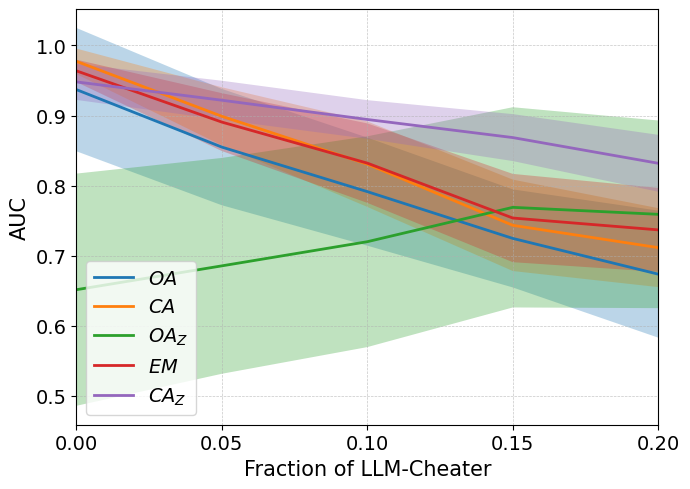

In [79]:
score_names = [r'$OA$', r'$CA$', r'$OA_Z$', r'$EM$', r'$CA_Z$']
fig_name = 'figures/detect_preference_gpt4_mistral.png'
plot_with_error_bars(AUC_score_mistral_gpt4, p_range, score_names, fig_name)

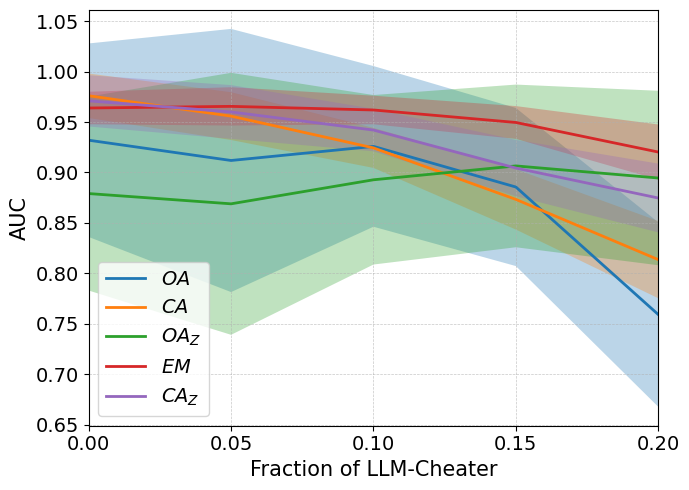

In [81]:
score_names = [r'$OA$', r'$CA$', r'$OA_Z$', r'$EM$', r'$CA_Z$']
fig_name = 'figures/detect_preference_gpt3_mistral.png'
plot_with_error_bars(AUC_score_mistral_gpt3, p_range, score_names, fig_name)

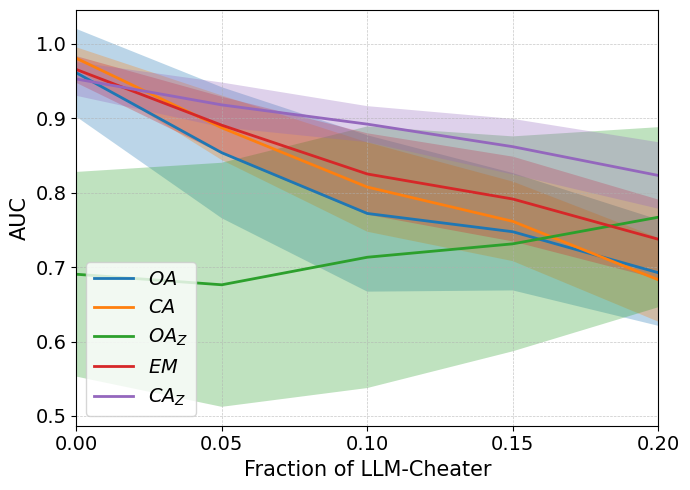

In [83]:
score_names = [r'$OA$', r'$CA$', r'$OA_Z$', r'$EM$', r'$CA_Z$']
fig_name = 'figures/detect_preference_gpt3_gpt4.png'
plot_with_error_bars(AUC_score_gpt3_gpt4, p_range, score_names, fig_name)

In [ ]:
for i in range(5):
    arr = AUC_score_gpt4[:,:,i]
    bottom_10_percent = np.percentile(arr, 10)
    print('average auc =', np.round(np.average(arr), 2), '10% quantial =', np.round(bottom_10_percent, 2))

## Increasing sample size

In [42]:
"""
Vary the fraction of questions that the principal can sample
"""

import warnings
from sklearn.metrics import roc_auc_score
warnings.filterwarnings("ignore")

sample_size = np.arange(0,1,0.2)
N = 20
K = 5
p_llm = 0.15
llm_data_list = [[gpt3_data, gpt3_data_2], [gpt4_data, gpt4_data_2], [mistral_data, mistral_data_2], [gemma_data, gemma_data_2], [phi_data, phi_data_2]]
llm_cond_list = [gpt3_data_3, gpt4_data_3, mistral_data_3, gemma_data_3, phi_data_3]
AUC_score_sample_size = np.zeros((5, len(sample_size), N))

AUC_score_ca = np.zeros((5, N))

for l in range(5):
    cheater_list = llm_data_list[l]
    for i in range(N):
        r1 = np.random.rand()
        r2 = np.random.rand()
        p_random = r2*0.15
        p_biased = r1*0.15
        # Simulate data
        data_corrupt, identity = modifying_human_data(human_data, p_llm, p_random, p_biased, cheater_list, prior)
        while np.any(np.all(np.isnan(data_corrupt), axis=0)):
            data_corrupt, identity = modifying_human_data(human_data, p_llm, p_random, p_biased, cheater_list, prior)

        # Learn delta matrix
        delta_corrupt = delta_matrix(data_corrupt)
        cond_delta_corrupt = conditional_delta_matrix(data_corrupt, llm_cond)
    
        ca_score = CA_score(data_corrupt, delta_corrupt)
        mask_ca = ~np.isnan(ca_score)
        auc_ca = roc_auc_score(identity[mask_ca], ca_score[mask_ca])
        AUC_score_ca[l,i] = auc_ca
        
        for j,s in enumerate(sample_size):
            n = len(gpt4_data_3)
            k = int(n*s)
            
            llm_cond = llm_cond_list[l].copy()
            nan_indices = np.random.choice(n, size=k, replace=False)
            llm_cond[nan_indices] = np.nan
            
    
            # Learn delta matrix
            cond_delta_corrupt = conditional_delta_matrix(data_corrupt, llm_cond)
        
            # cond_ca_score = np.ones(len(ca_score))
            cond_ca_score = CA_score_conditioned(data_corrupt, llm_cond, cond_delta_corrupt)
    
            mask_cond = ~np.isnan(cond_ca_score)
            auc_ca_cond = roc_auc_score(identity[mask_cond], cond_ca_score[mask_cond])
            
            AUC_score_sample_size[l,j,i] = auc_ca_cond
    print(np.average(AUC_score_sample_size[l], axis = 1), np.average(AUC_score_ca[l]))

[0.8239335  0.81211012 0.79003483 0.75426682 0.70824629] 0.7702196777676323
[0.74721037 0.72205793 0.71804799 0.68846464 0.6495554 ] 0.48329662961453784
[0.88397917 0.86445873 0.84647113 0.79939006 0.74214905] 0.8286768816294027
[0.83853911 0.82304712 0.80933782 0.78185115 0.7205383 ] 0.7675653412619858
[0.87213991 0.84875269 0.83434948 0.80233861 0.73961893] 0.7261789826760152


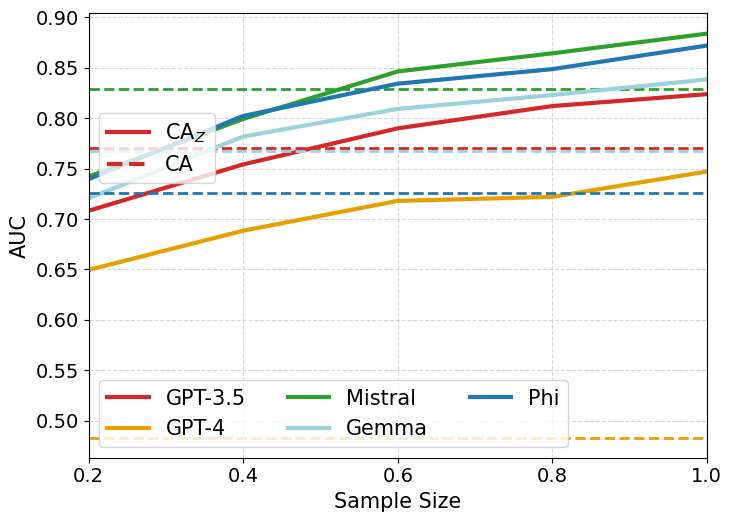

In [46]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,5))
LLM_names = ['GPT-3.5', 'GPT-4', 'Mistral', 'Gemma', 'Phi']
colors = ['#d62728', '#e69f00', '#2ca02c', '#9cd2db', '#1f77b4', '#7600c4']
for i in range(5):
    plt.plot([0.2,0.4,0.6,0.8,1], np.average(AUC_score_sample_size[i], axis = 1)[::-1], color = colors[i], linewidth = 3, label=LLM_names[i])
    plt.axhline(y=np.average(AUC_score_ca[i]), color = colors[i], linestyle = '--', linewidth = 2)
legend1 = plt.legend( ncol=3, fontsize=15)
plt.xlim(0.2,1)
plt.tight_layout()
ax.grid(visible=True, linestyle="--", alpha=0.5)
ax.set_xlabel("Sample Size", fontsize=15)
ax.set_ylabel("AUC", fontsize=15)
plt.xticks(np.arange(0.2, 1.01, 0.2), fontsize=14)
plt.yticks(fontsize=14)

solid_line = plt.Line2D([0], [0], color='#d62728', linewidth=3, linestyle='-')
dashed_line = plt.Line2D([0], [0], color='#d62728', linewidth=3, linestyle='--')

# Add a second legend for the line styles
legend2 = plt.legend(
    [solid_line, dashed_line],
    [r"CA$_Z$", "CA"],
    loc="upper center",
    bbox_to_anchor=(0.11, 0.8),
    fontsize=15
)
ax.add_artist(legend1)
plt.savefig('figures/sample_size_preference_0525.png', dpi=300, bbox_inches='tight')